Import relevant modules

In [1]:
import seaborn as sns
import filehandler as tx
import matplotlib.pyplot as plt

Global variables

In [2]:

main_dir = '90815 (Bulk 28kDa)\\Annealing30min2kto260'

temps, file_dict = tx.files_to_dict(main_dir)       #Fetch temperature list and file names from directory


#print(file_dict[temps[2]][1])


In [3]:
big_data = tx.load_files(main_dir, temps, file_dict)

Modified c:\Users\albpe\OneDrive - Universidade da Coruña\Escritorio\fDSC\90815 (Bulk 28kDa)\Annealing30min2kto260\Segment08_minus80degree_modified_modified_modified.txt.
Modified c:\Users\albpe\OneDrive - Universidade da Coruña\Escritorio\fDSC\90815 (Bulk 28kDa)\Annealing30min2kto260\Segment12_minus80degree_ref_modified_modified_modified.txt.
Modified c:\Users\albpe\OneDrive - Universidade da Coruña\Escritorio\fDSC\90815 (Bulk 28kDa)\Annealing30min2kto260\Segment18_minus60degree_modified_modified_modified.txt.
Modified c:\Users\albpe\OneDrive - Universidade da Coruña\Escritorio\fDSC\90815 (Bulk 28kDa)\Annealing30min2kto260\Segment22_minus60degree_ref_modified_modified_modified.txt.
Modified c:\Users\albpe\OneDrive - Universidade da Coruña\Escritorio\fDSC\90815 (Bulk 28kDa)\Annealing30min2kto260\Segment28_minus40degree_modified_modified_modified.txt.
Modified c:\Users\albpe\OneDrive - Universidade da Coruña\Escritorio\fDSC\90815 (Bulk 28kDa)\Annealing30min2kto260\Segment32_minus40degre

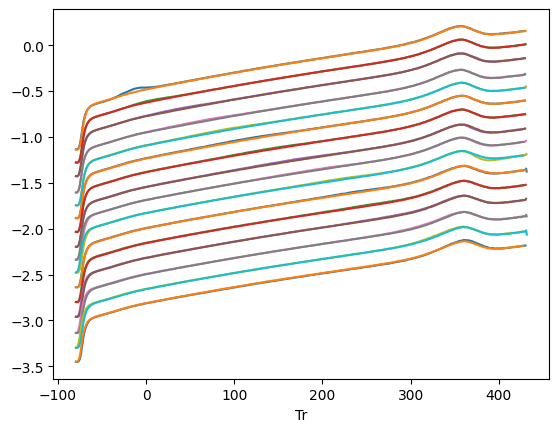

In [8]:
margin = .1 * (big_data[0][0]['Heat Flow'].max() - big_data[0][0]['Heat Flow'].min())
ax1 = plt.gca()
for i in range (1, len(big_data)-1):
    dif = abs(big_data[i][0]['Heat Flow'] - big_data[i-1][0]['Heat Flow']).max()
    big_data[i][0]['Heat Flow'] -= dif + margin
    big_data[i][1]['Heat Flow'] -= dif + margin
    big_data[i][0].plot(x = 'Tr', y = 'Heat Flow', ax = ax1, legend=False)
    big_data[i][1].plot(x = 'Tr', y = 'Heat Flow', ax = ax1, legend=False)